# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откроем файл с данными и изучим общую информацию. 

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 100

try:
    real_estate = pd.read_csv('C:/Users/COVIDisLIE/Downloads/real_estate_data.csv', sep='\t')
except:
    real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

real_estate.info()
print('\nЧисло дубликатов:', real_estate.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [73]:
real_estate.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [74]:
real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-info">
    Строим гистограммы имеющихся столбцов
    </div>

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

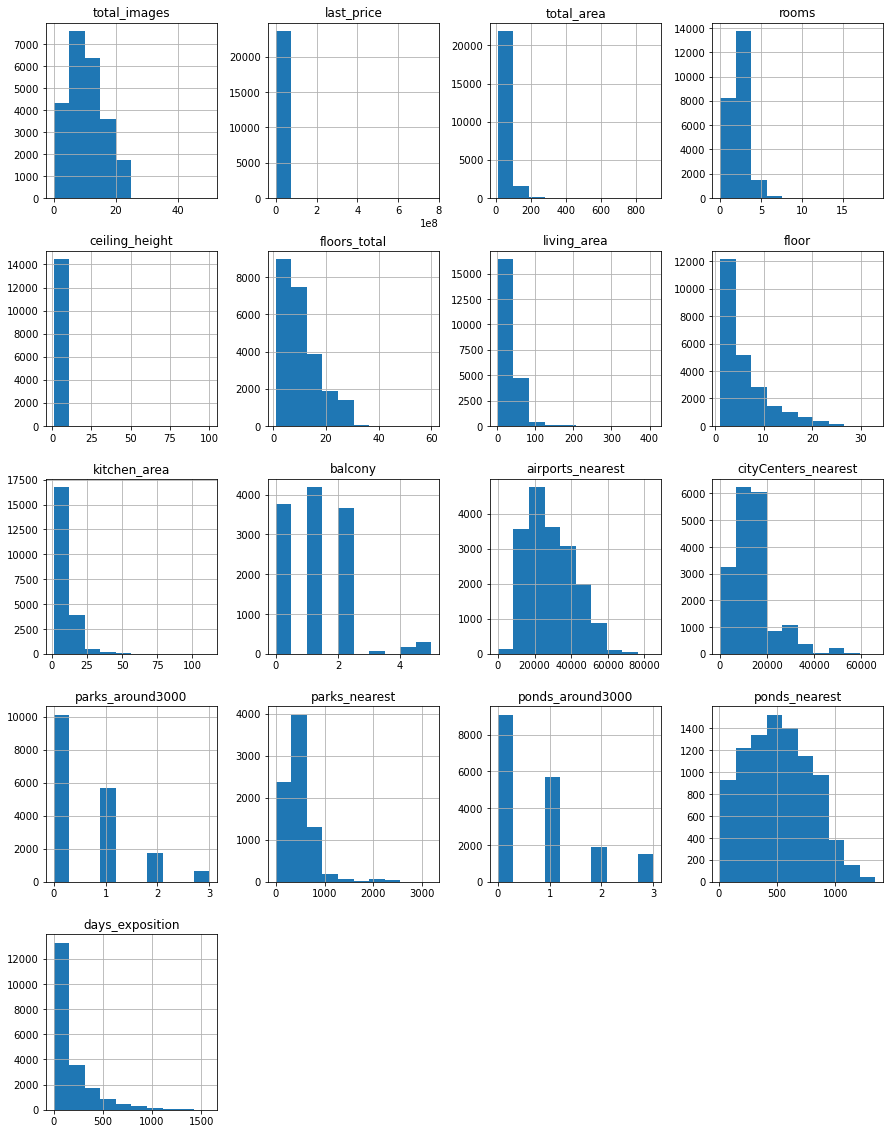

In [75]:
real_estate.hist(figsize=(15,20));

<div class="alert alert-info">
    Получили данные и изучили их. Видно, что имеются пропущенные значения, заполним пропуски и переименуем столбец с расстоянием до центра города (cityCenters_nearest). Еще имеются несоответствия типа данных в ряде столбцов:
    
**floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition** должны быть целочисленными, 
    
**first_day_exposition** - тип даты и времени, но время по всей видимости не указывается.
</div>


## Предобработка данных

In [76]:
real_estate = real_estate.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

<div class="alert alert-info">
    Приводим к целочисленному типу значения столбца стоимости квартир
    </div>

In [77]:
real_estate['last_price'] = real_estate['last_price'].astype(int)

<div class="alert alert-info">
Приводим дату публикации к типу даты и заодно к формату без указания времени, так как оно все равно не учитывается
    </div>

In [78]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%d')

<div class="alert alert-info">
    В столбце is_apartment слишком мало ненулевых значений. Можно избавиться от столбцов total_images, studio и open_plan - в дальнейшей работе они нам не понадобятся
</div>

In [79]:
real_estate.drop(['is_apartment'], axis='columns', inplace=True)
real_estate.drop(['total_images'], axis='columns', inplace=True)
real_estate.drop(['studio'], axis='columns', inplace=True)
real_estate.drop(['open_plan'], axis='columns', inplace=True)

In [80]:
real_estate.isnull().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-info">
    Пропуски могут быть связаны с тем, что не все поля являются обязательными для заполнения, а большинство пользователей заполняет только обязательные. Пропуски в ряде столбцов могут быть связаны с тем, что пользователь не упомянул данные параметры в объявлении, соответственно, они пусты. В столбцах <b>balcony, parks_around3000, ponds_around3000</b> не указали данные, значит истинное значение здесь равно 0, так как балконов у квартиры нет, либо водоемов и парков поблизости тоже не имеется. Заменим пропуски на 0, а заодно изменим тип данных на int, так как вещественного типа данных здесь быть не может.
</div>

In [81]:
real_estate['balcony'] = real_estate['balcony'].fillna(0).astype(int)
real_estate['parks_around3000'] = real_estate['parks_around3000'].fillna(0).astype(int)
real_estate['ponds_around3000'] = real_estate['ponds_around3000'].fillna(0).astype(int)

<div class="alert alert-info">
    От наблюдений с пустыми значениями <b>floors_total и locality_name</b> избавимся, так как отсутствие этих данных помешает нам в дальнейших рассчётах. Для заполнения столбца <b>locality_name</b> нам мог бы понадобиться адрес квартиры, а для <b>floors_total</b> - высота дома. Также приведем этажность домов к целочисленному значению
    </div>

In [82]:
real_estate.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

In [83]:
real_estate['floors_total'] = real_estate['floors_total'].astype(int)

<div class="alert alert-info">
    Заменяем пустые значения жилой площади и площади кухни
    </div>

In [84]:
living_ratio = real_estate['living_area'].mean() / real_estate['total_area'].mean()
kitchen_ratio = real_estate['kitchen_area'].mean() / real_estate['total_area'].mean()
real_estate['living_area'].fillna(living_ratio * real_estate['total_area'], inplace=True)
real_estate['kitchen_area'].fillna(kitchen_ratio * real_estate['total_area'], inplace=True)

<div class="alert alert-info">
Проверим столбец с высотой потолков, сначала проверим пропуски в нем
</div>


In [85]:
print('Количество пропусков:', real_estate['ceiling_height'].isna().mean().round(3)*100, '%')

Количество пропусков: 38.5 %


<div class="alert alert-info">
    Более 38% от всех данных столбца. Это довольно большая величина, поэтому эти пропуски следует заполнить.
    </div>

In [86]:
real_estate['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-info">
    Разброс значений высоты потолков не очень высок, но все же есть странное значение в 100 метров, возможно человек ошибся и написал в сантиметрах. Заполнение одним числом выглядит не лучшим решением, поэтому найдём через корреляцию те столбцы, при помощи которых мы можем произвести заполнение пропусков
    </div>

In [87]:
Correlation = real_estate.corr()
Correlation.sort_values(by='ceiling_height', ascending=False)['ceiling_height'].reset_index().head()

,index,ceiling_height
0,ceiling_height,1.000000
1,total_area,0.095432
2,living_area,0.093572
3,last_price,0.085401
4,kitchen_area,0.084273


<div class="alert alert-info">
    Самая лучшая корреляция между общей площадью и высотой потолков, создадим словарь с ней и медианным значением высотой потолков
    </div>

In [88]:
total_area_dict = (real_estate
                 .pivot_table(index='total_area', values='ceiling_height', aggfunc='median')
                 .sort_values(by='total_area')
                  )

total_area_dict.columns = ['median_ceiling_height']
total_area_dict

,median_ceiling_height
total_area,
12.0,2.550
13.0,3.000
15.0,2.600
17.0,2.725
17.2,2.770
...,...
507.0,4.450
590.0,3.500
618.0,3.400


<div class="alert alert-info">
    Добавим отдельным столбцом median_ceiling_height полученный словарь в исходный датафрейм, затем произведём замену пропусков и удалим рабочий столбец с медианным значением высоты потолков.
    </div>

In [89]:
real_estate = real_estate.merge(total_area_dict, on='total_area', how='left')

real_estate['ceiling_height'] = (np.where(real_estate['ceiling_height'].isna() == True, 
                                              real_estate['median_ceiling_height'],
                                              real_estate['ceiling_height']))
real_estate.drop('median_ceiling_height', axis='columns', inplace=True)

print('Количество пропусков:', real_estate['ceiling_height'].isna().mean().round(4)*100, '%')

Количество пропусков: 2.52 %


<div class="alert alert-info">
    Всего 2,5% пропусков ! Их можно заменить медианным значением
    </div>

In [90]:
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(real_estate['ceiling_height'].median())

In [91]:
real_estate.isnull().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

<div class="alert alert-info">
    Проверим пропуски в days_exposition, информация может отсутствовать из-за того, что неизвестно, когда было закрыто объявление о продаже, либо еще какие-то причины
    </div>

In [92]:
real_estate['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [93]:
real_estate['days_exposition'].isna().mean().round(3)*100

13.5

<div class="alert alert-info">
    Столбец иллюстрирует момент продажи квартиры - ведь если недвижимость продана, нет смысла обновлять объявление и оставлять его на сервисе. Соответственно, мы не можем заполнить пропуски по средней или медиане, поскольку не обладаем информацией, когда была продана квартира. А пропуски могут быть потому что недвижимость вовсе не была продана, и объявление просто осталось незакрытым.
Проверим это, посчитав количество таких объявлений по дате выставления.
    </div>

In [94]:
(real_estate
                 .loc[real_estate['days_exposition'].isna() == True]
                 .pivot_table(index='first_day_exposition', values='last_price', aggfunc='count')
                 .sort_values(by='last_price', ascending=False)
                 .head(20)
)

,last_price
first_day_exposition,
2019-04-22,46
2019-04-18,44
2019-04-04,36
2019-04-08,36
2019-04-29,36
2019-04-26,35
2019-04-17,34
2019-04-15,34
2019-04-24,32


<div class="alert alert-info">
    Большинство таких объявлений было выставлено в апреле 2019 года, а значит квартиры еще не были проданы, объявление не было "закрыто", а в столбце не появилось соответствующей отметки.

Оставим пропуски в данном столбце незаполненными.
    </div>

<div class="alert alert-info">
    Пропуски в следующих столбцах заменим на нетипичные, чтобы в дальнейшем использовать их для исследований
    </div>

In [95]:
real_estate['airports_nearest'] = real_estate['airports_nearest'].fillna(-1)
real_estate['city_centers_nearest'] = real_estate['city_centers_nearest'].fillna(-1)
real_estate['parks_nearest'] = real_estate['parks_nearest'].fillna(-1)
real_estate['ponds_nearest'] = real_estate['ponds_nearest'].fillna(-1)
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(-1).astype(int)

<div class="alert alert-info">
    Неявные дубликаты названий городов. Проверим их количество
    </div>

In [96]:
len(real_estate['locality_name'].unique())

364

In [97]:
real_estate['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

<div class="alert alert-info">
    Заменим все буквы -ё- на -е-
    </div>

In [98]:
real_estate['locality_name'] = real_estate['locality_name'].str.replace('ё', 'е', regex=True)

In [99]:
len(real_estate['locality_name'].unique())

330

<div class="alert alert-info">
    Немного уменьшили количество пропусков на 34
    </div>

In [100]:
real_estate['locality_name'].isna().sum()

0

In [101]:
real_estate = real_estate.dropna(subset=['locality_name'])

In [102]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23564
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23565 non-null  int32         
 1   total_area            23565 non-null  float64       
 2   first_day_exposition  23565 non-null  datetime64[ns]
 3   rooms                 23565 non-null  int64         
 4   ceiling_height        23565 non-null  float64       
 5   floors_total          23565 non-null  int32         
 6   living_area           23565 non-null  float64       
 7   floor                 23565 non-null  int64         
 8   kitchen_area          23565 non-null  float64       
 9   balcony               23565 non-null  int32         
 10  locality_name         23565 non-null  object        
 11  airports_nearest      23565 non-null  float64       
 12  city_centers_nearest  23565 non-null  float64       
 13  parks_around3000

<div class="alert alert-info">
    Мы изменили тип данных и удалили пропуски, где это возможно
</div>

## Посчитаем и добавим в таблицу новые столбцы

   ### Цена квадратного метра

<div class="alert alert-info"> 
    Цена квадратного метра - это соотношение окончательной цены к общей площади. Добавим к датафрейму столбец price_per_meter и рассчитаем его делением столбца last_price на столбец total_area
    </div>

In [103]:
real_estate['price_per_meter'] = (real_estate['last_price'] / real_estate['total_area']).astype(int)

### День недели, месяц и год публикации объявления

<div class="alert alert-info"> 
    День недели, месяц и год публикации объявления получим из столбца first_day_exposition. Создадим три новых столбца в датафрейме: <b>weekday_exposition, month_exposition, year_exposition</b>
     </div>

In [104]:
# день недели публикации объявления
real_estate['weekday_exposition'] = pd.DatetimeIndex(real_estate['first_day_exposition']).weekday
# месяц публикации объявления
real_estate['month_exposition'] = pd.DatetimeIndex(real_estate['first_day_exposition']).month
# год публикации объявления
real_estate['year_exposition'] = pd.DatetimeIndex(real_estate['first_day_exposition']).year

In [105]:
real_estate.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition
0,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370,3,3,2019
1,3350000,40.4,2018-12-04,1,2.70,11,18.600000,1,11.000000,2,поселок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,82920,1,12,2018
2,5196000,56.0,2015-08-20,2,2.60,5,34.300000,4,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,3,8,2015
3,64900000,159.0,2015-07-24,3,3.14,14,90.816648,9,27.836861,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176,4,7,2015
4,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018


### Этаж квартиры

<div class="alert alert-info">
    Можно определить 3 категории по этажу квартиры: первый, последний и другой. Если значение в столбце floor равно 1 - это первый; если оно равно значению в столбце floors_total (всего этажность дома) - это последний; в остальных случаях - другой. Создадим новый столбец в датафрейме floor_category и заполним его, исходя из указанных условий через функцию.
    </div>

In [106]:
def floor_group(row):
        floor = row['floor']
        if floor == 1:
            return 'первый'
        elif floor == row['floors_total']:
            return 'последний'
        else:
            return 'другой'

In [107]:
real_estate['floor_category'] = real_estate.apply(floor_group, axis=1)

### Расстояние до центра города в километрах

<div class="alert alert-info">
    Переведем метровые значения в километры и приведем к целочисленным значениям
    </div>

In [108]:
real_estate['city_centers_nearest'] = (real_estate['city_centers_nearest'] / 1000).astype(int)
real_estate['airports_nearest'] = (real_estate['airports_nearest'] / 1000).astype(int)

In [109]:
real_estate.head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category
0,13000000,108.00,2019-03-07,3,2.700,16,51.000000,8,25.000000,0,Санкт-Петербург,18,16,1,482.0,2,755.0,-1,120370,3,3,2019,другой
1,3350000,40.40,2018-12-04,1,2.700,11,18.600000,1,11.000000,2,поселок Шушары,12,18,0,-1.0,0,-1.0,81,82920,1,12,2018,первый
2,5196000,56.00,2015-08-20,2,2.600,5,34.300000,4,8.300000,0,Санкт-Петербург,21,13,1,90.0,2,574.0,558,92785,3,8,2015,другой
3,64900000,159.00,2015-07-24,3,3.140,14,90.816648,9,27.836861,0,Санкт-Петербург,28,6,2,84.0,3,234.0,424,408176,4,7,2015,другой
4,10000000,100.00,2018-06-19,2,3.030,14,32.000000,13,41.000000,0,Санкт-Петербург,31,8,2,112.0,1,48.0,121,100000,1,6,2018,другой
5,2890000,30.40,2018-09-10,1,2.520,12,14.400000,5,9.100000,0,городской поселок Янино-1,0,0,0,-1.0,0,-1.0,55,95065,0,9,2018,другой
6,3700000,37.30,2017-11-02,1,2.650,26,10.600000,6,14.400000,1,поселок Парголово,52,19,0,-1.0,0,-1.0,155,99195,3,11,2017,другой
7,7915000,71.60,2019-04-18,2,2.775,24,40.896050,22,18.900000,2,Санкт-Петербург,23,11,0,-1.0,0,-1.0,-1,110544,3,4,2019,другой
8,2900000,33.16,2018-05-23,1,2.600,27,15.430000,26,8.810000,0,поселок Мурино,0,0,0,-1.0,0,-1.0,189,87454,2,5,2018,другой
9,5400000,61.00,2017-02-26,3,2.500,9,43.600000,7,6.500000,2,Санкт-Петербург,50,15,0,-1.0,0,-1.0,289,88524,6,2,2017,другой


In [110]:
real_estate.isnull().sum()

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
price_per_meter         0
weekday_exposition      0
month_exposition        0
year_exposition         0
floor_category          0
dtype: int64

## Промежуточный вывод

<div class="alert alert-info">
    Мы обнаружили пустые значения практически во всех столбцах с данными, кроме количества фотографий, цены, площади, даты размещения, количестве комнат, этажей, принадлежности к студии и свободной планировке. Причины могут быть разными. Часть пропусков могла быть связана с тем, что клиент не указал число в пункте, по умолчанию предполагая отсутствие данного фактора в недвижимости. Часть пропусков могла быть связана с техническими моментами выгрузки или заполнения. Также есть пропуски в данных, заполненных автоматически с помощью картографических данных - эти пропуски могут быть связаны со слишком большой отдаленностью объектов, либо их отсутствием в населенном пункте. Все пропуски были обработаны и заполнены на основе имеющейся информации и предпосылках о причинах их наличия.

Также мы обнаружили, что многие столбцы, характеризующие количество (этажей, балконов, парков и т.п.) имеют тип данных 'float', но по логике могут принимать только целочисленные значения, поэтому их тип был изменен на 'int' (для тех столбцов, в которых мы смогли заполнить пропуски). Часть столбцов, хотя и может примать дробные значения, в рамках анализа интересует нас только в целых величинах, поэтому их тип также был изменен на 'int'. Кроме того, был изменен тип данных столца с датой публикации объявления - с 'object'  на 'datetime'.

Кроме того, нами были рассчитаны и добавлены в таблицу данные по цене квадратного метра; дню недели, месяцу и году публикации объявления; категории этажа квартиры; 
    
Эти вспомогательные данные в последующем будут нужны для исследовательского анализа.
    </div>

## Исследовательский анализ данных

<div class="alert alert-info">
    Изучим параметры: площадь, цена, число комнат, высота потолков. Автоматизируем построение гистограмм для каждого параметра. Посмотрим, как выглядят диаграммы размаха для изученных данных и избавимся от выбросов.
     </div>

In [111]:
def draw_hist(col, xmin, xmax):
    real_estate[col].hist(bins=50, range=(xmin, xmax), figsize=(10,10))

In [112]:
def draw_boxplot(col, ymin=-50, ymax=200):
    plt.ylim(ymin, ymax)
    real_estate.boxplot(col)

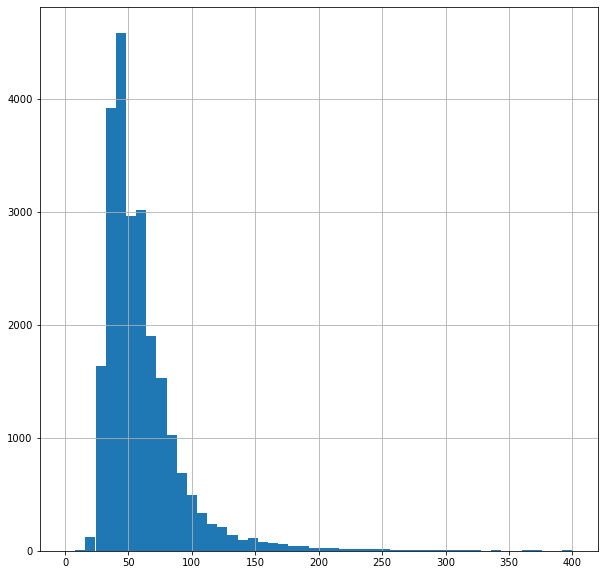

In [113]:
draw_hist('total_area', 0, 400)

<div class="alert alert-info">
    Гистограмма по столбцу total_area (общая площадь квартиры) выглядит правдоподобно - квартир площадью менее 25 кв.м почти нет, большая доля квартир имеет площадь 30-60 кв.м, также видим мощный пик у значения 45 кв.м. После значения 100 кв.м число квартир стремительно убывает.
    </div>

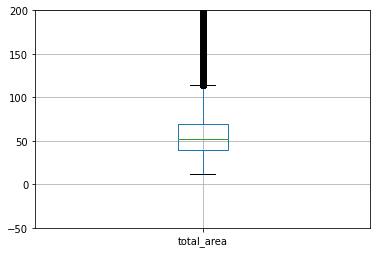

In [114]:
draw_boxplot('total_area')

<div class="alert alert-info">
    Разброс нормальных значений начинается около 15 кв.м и заканчивается у 120 кв.м. Избавимся от всех выбивающихся значений
    </div>

In [115]:
real_estate = real_estate.query('total_area>=15 and total_area<=120')

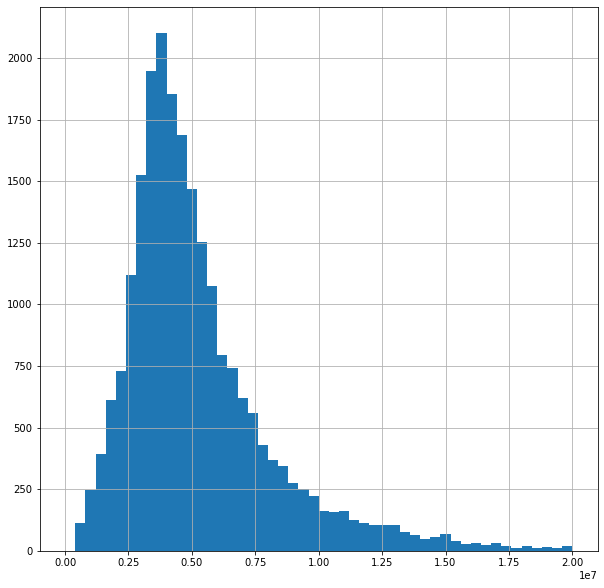

In [116]:
draw_hist('last_price', 0, 20000000)

<div class="alert alert-info">
    Можем отметить пик у значения цены 3 млн. Квартир, дороже 10 млн, гораздо меньше.
    </div>

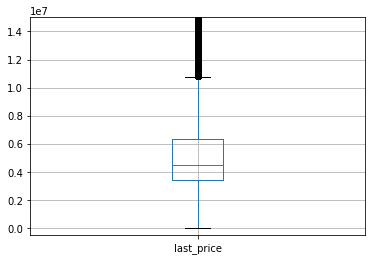

In [117]:
draw_boxplot('last_price', -500000, 15000000)

<div class="alert alert-info">
Нормальные значения находятся в интервале от нуля до 11 млн. Оставим только их. 
Но сначала проверим, нет ли в данных выбросов, например, значений, меньших 15000.
</div>

In [118]:
real_estate.query('last_price < 15000')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category
8750,12190,109.0,2019-03-20,2,2.75,25,32.0,25,40.5,0,Санкт-Петербург,36,9,1,805.0,0,-1.0,8,111,2,3,2019,последний


<div class="alert alert-info">
Объявление выглядит неправдоподобным, избавимся от него 
</div>

In [119]:
real_estate = real_estate.query('last_price>10000 and last_price<=11000000')

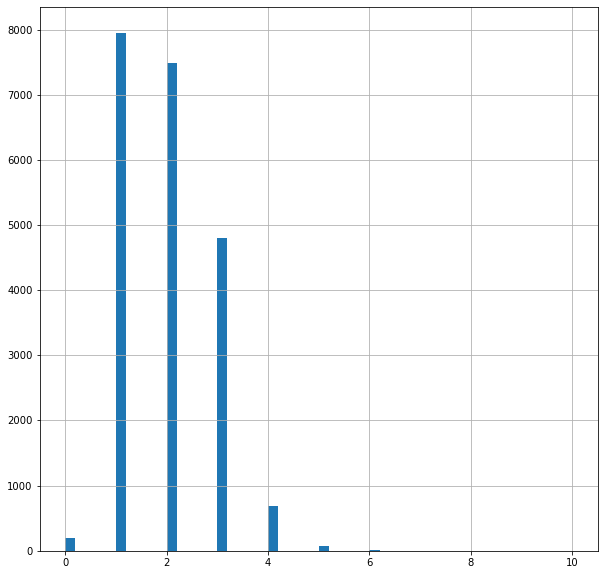

In [120]:
draw_hist('rooms', 0, 10)

<div class="alert alert-info">
    У большинства квартир 1-3 комнаты. Видим небольшой сегмент с нулевым количеством комнат - это студии.
    </div>

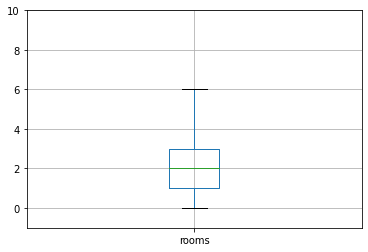

In [121]:
draw_boxplot('rooms', -1, 10)

<div class="alert alert-info">
    Оставим только нормальные значения от 0 до 6
    </div>

In [122]:
real_estate = real_estate.query('rooms>=0 and rooms <7')

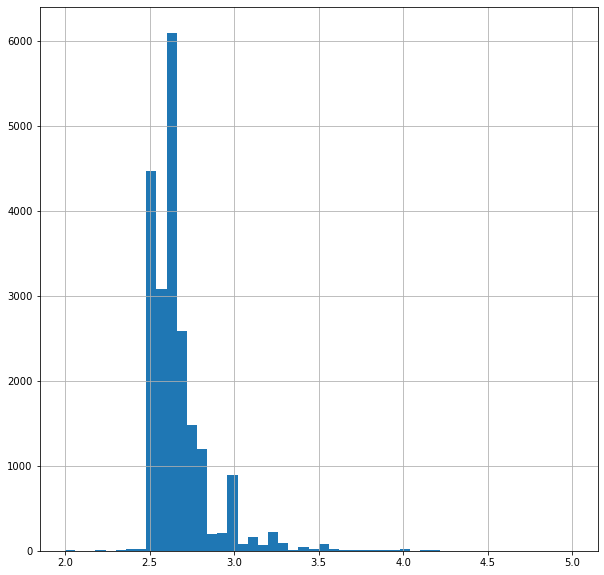

In [123]:
draw_hist('ceiling_height', 2, 5)

<div class="alert alert-info">
У большей части квартир высота потолков 2.5-2.7 м.
    </div>

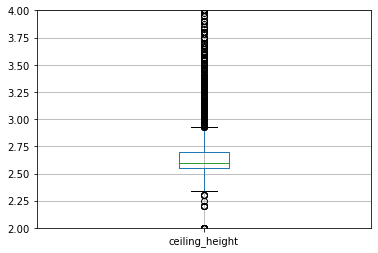

In [124]:
draw_boxplot('ceiling_height', 2, 4)

<div class="alert alert-info">
    Избавимся от всех значений, меньших 2.2 и больших 3.
    </div>

In [125]:
real_estate = real_estate.query('ceiling_height>=2.2 and ceiling_height <=3')

<div class="alert alert-info">
    Построим гистограмму для времени продажи квартиры и диаграмму размаха, изучим эти данные.</div>

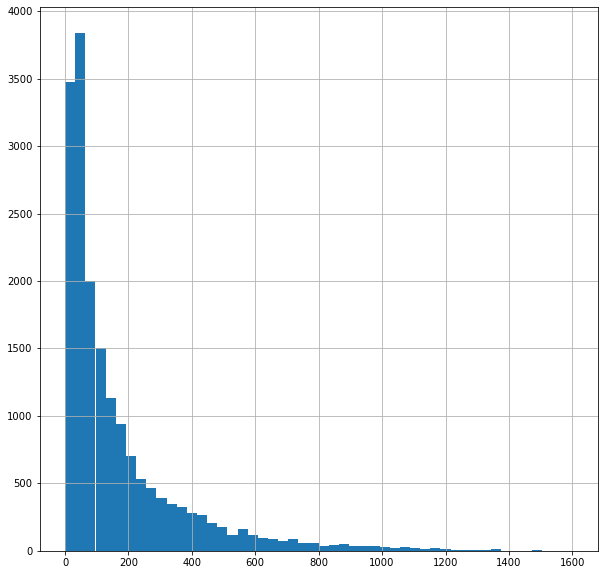

In [126]:
draw_hist('days_exposition', 0, 1600)

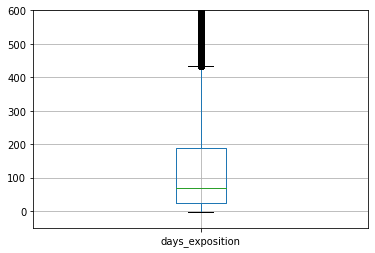

In [127]:
draw_boxplot('days_exposition', -50, 600)

<div class="alert alert-info">
    Большая часть значений находится в диапазоне до 200 дней. Посмотрим на среднее и медиану.
     </div>

In [128]:
real_estate['days_exposition'].describe()

count    20265.000000
mean       148.952726
std        201.988225
min         -1.000000
25%         24.000000
50%         70.000000
75%        188.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-info">
    <b>Если продажа состоялась в срок до 24 дней после подачи объявления, то это очень быстрая сделка, а если через 188 и больше дней, то она длилась долго.
Разница среднего и медианы почти в два раза. Это говорит о том, что в распределении длинный хвост высоких значений, влияющих на среднее, но не на медиану.
Как видим по графикам, нормальные значения находятся в промежутке от 0 до 430. Уберем из таблицы редкие и выбивающиеся значения</b>
    </div>

In [129]:
real_estate = real_estate.query('days_exposition>0 and days_exposition<=430')

<div class="alert alert-info">Изучим, какие факторы больше всего влияют на стоимость квартиры. Зависит ли цена квадратного метра от числа комнат и удалённости от центра? Также изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом
    </div>

In [130]:
def draw_plot(data, y, x):
    data.plot(y=y, x=x, kind='scatter', alpha=0.05, figsize=(10,8))

In [131]:
index = real_estate.index 
price_rooms_area_corr = real_estate.pivot_table(index=index, values=['total_area','rooms', 'price_per_meter'], aggfunc='mean')
price_rooms_area_corr.corr()

,price_per_meter,rooms,total_area
price_per_meter,1.000000,-0.257732,-0.120640
rooms,-0.257732,1.000000,0.805026
total_area,-0.120640,0.805026,1.000000


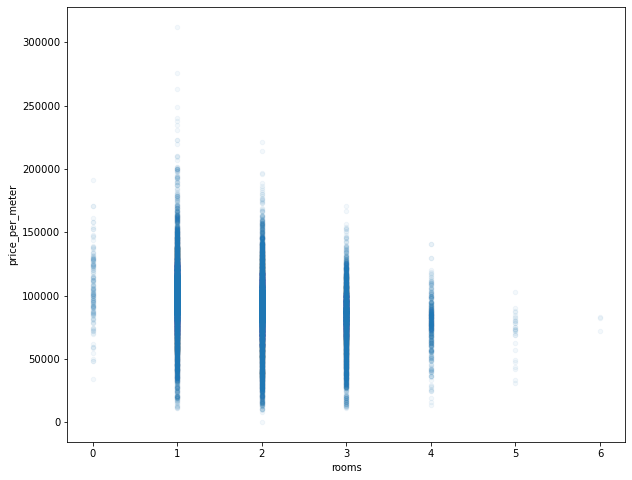

In [132]:
draw_plot(price_rooms_area_corr, 'price_per_meter', 'rooms')

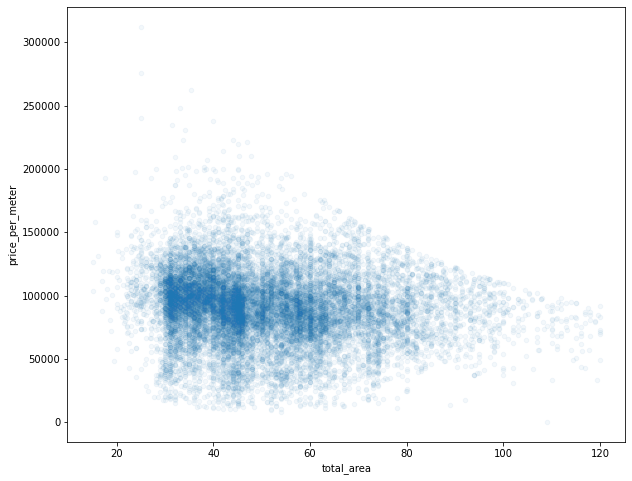

In [133]:
draw_plot(price_rooms_area_corr, 'price_per_meter', 'total_area')

<div class="alert alert-info">
    Видим, что стоимость средне зависит от общей площади, и в меньшей степени от количества комнат. Как наблюдение - больше всего в таблице зависимость между количеством комнат и площадью, что достаточно логично.

Тем не менее, с увеличением количества комнат цена за кв.м падает. А если рассматриваем общую площадь, то стоимость за квадратный метр падает с каждым метром при увеличении площади после 60 кв.м
    </div>

In [134]:
distance_from_center = real_estate.query('city_centers_nearest != -1')
distance_from_center['price_per_meter'].corr(distance_from_center['city_centers_nearest'])

0.1974304622164183

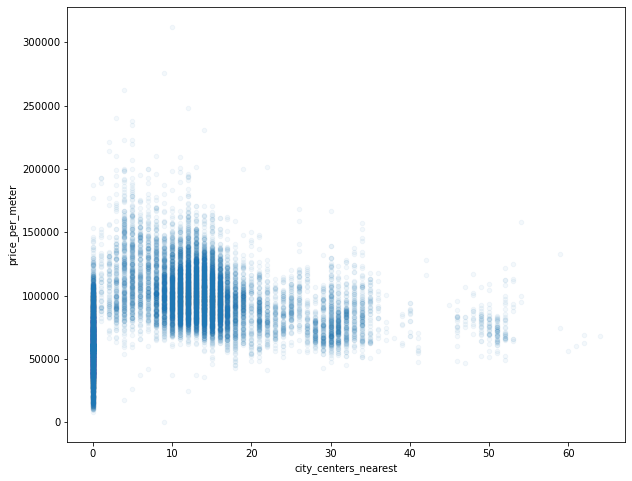

In [135]:
draw_plot(distance_from_center, 'price_per_meter', 'city_centers_nearest')

<div class="alert alert-info">
    Увеличение расстояния от центра связано с уменьшением стоимости квартир
    
   Посмотрим на взаимосвязь стоимости квартиры и этажа, на котором она расположена.
    
</div>

In [136]:
price_and_floor_category = real_estate.loc[:, ['floor_category', 'price_per_meter']]

price_and_floor_category_corr = price_and_floor_category.floor_category.str.get_dummies(sep=' ').corrwith(price_and_floor_category.price_per_meter)
price_and_floor_category_corr

другой       0.230726
первый      -0.183207
последний   -0.119553
dtype: float64

<div class="alert alert-info">
    Видим, что квартиры, расположенные на первом и последнем этаже, стоят дешевле, чем на любом другом.

С помощью метода heatmap из библиотеки seaborn посмотрим корреляцию.
    </div>

<AxesSubplot:>

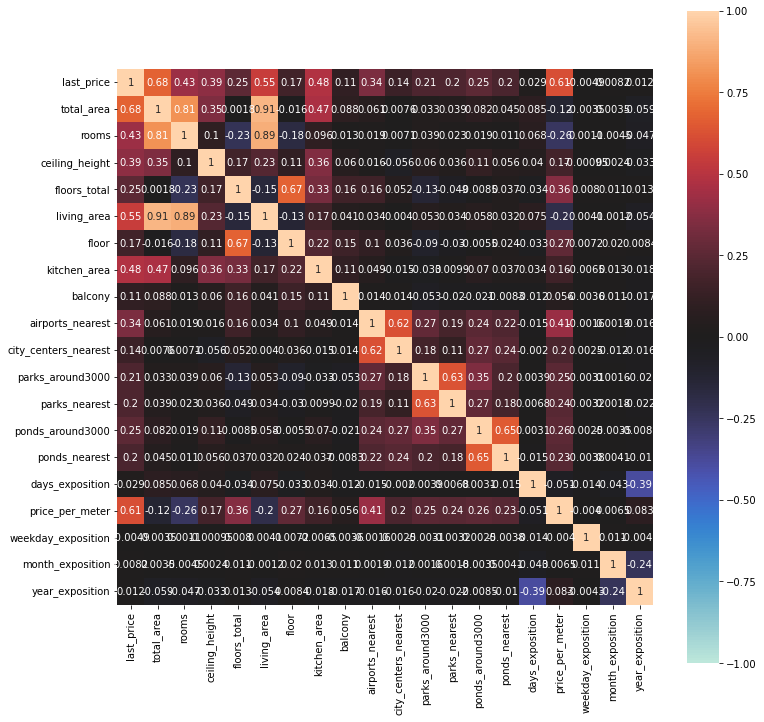

In [137]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(real_estate.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax);

<div class="alert alert-info">
    С помощью графика можем отметить, что сильнее всего связь у параметра price_per_meter (цена за кв.м.) с last_price(цена на момент снятия с публикации), что очень логично, 
    
общей и жилой площадью, площадью кухни, а так же с инфраструктурой вокруг (парки, водоемы, аэропорты).

    
<b>Посмотрим на взаимосвязь стоимости и времени размещения объявления: дня недели, месяца и года</b>.
    
</div>

In [138]:
exposition_date = (
    real_estate
    .pivot_table(index=index, values=
             [
                 'weekday_exposition', 
              'month_exposition', 
              'year_exposition', 
              'price_per_meter'
             ], aggfunc='mean')
)
exposition_date.corr()

,month_exposition,price_per_meter,weekday_exposition,year_exposition
month_exposition,1.000000,0.006537,0.011426,-0.238584
price_per_meter,0.006537,1.000000,-0.004018,0.082573
weekday_exposition,0.011426,-0.004018,1.000000,-0.004317
year_exposition,-0.238584,0.082573,-0.004317,1.000000


<div class="alert alert-info">
    При взгляде на коэффициент корреляции год, день недели и месяц размещения практически не связаны со стоимостью квартир. Однако, связь здесь может быть нелинейной, поэтому взглянем на графики зависимости.
</div>    

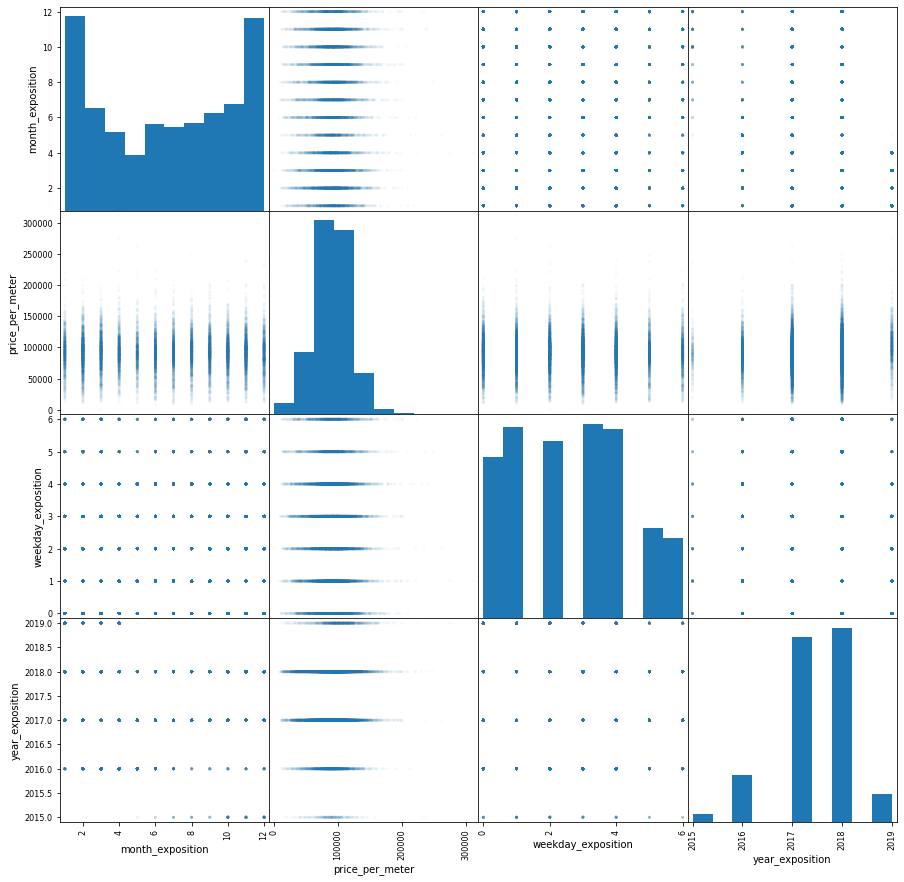

In [139]:
pd.plotting.scatter_matrix(exposition_date, figsize=(15, 15), alpha=0.03);

<div class="alert alert-info">
<b>Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных.
Квартиры, выставленные на продажу зимой, в декабре и январе, дороже всего. Дешевле всего - в мае.
    Можем отметить тенденцию роста цен от года к году, однако дороже всего квартиры стоили в 2018.</b>
</div>

## Средняя цена 1 кв.м в 10 населённых пунктах  
<div class="alert alert-info">
<b>Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.</b>
</div>

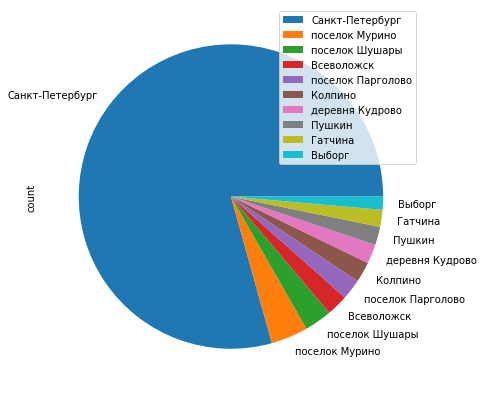

In [140]:
locality_price_per_meter = real_estate.loc[:, ['locality_name', 'price_per_meter']]
locality_price_per_meter = locality_price_per_meter.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
locality_price_per_meter.columns = ['count', 'mean_price_per_meter']
top10_locality = locality_price_per_meter.sort_values(by='count', ascending=False).head(10)
top10_locality.plot(y='count', kind='pie', figsize=(7, 7));

In [141]:
top10_locality

,count,mean_price_per_meter
locality_name,,
Санкт-Петербург,10113,103777.812222
поселок Мурино,500,85931.982000
поселок Шушары,372,77849.768817
Всеволожск,290,66966.206897
поселок Парголово,278,89214.258993
Колпино,276,74645.224638
деревня Кудрово,262,92622.610687
Пушкин,248,98944.016129
Гатчина,230,68235.378261


<div class="alert alert-info">
    
Дороже всего кадратный метр стоит в Санкт-Петербурге (вполне логично для города) и в Пушкине. Дешевле всего квартиру можно купить в Выборге.
    
Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Расстояние до центра приведем в километры и округлим до целых значений. Посчитаем среднюю цену для каждого километра. Затем построим график, который покажет, как цена зависит от удалённости от центра.
    
</div>

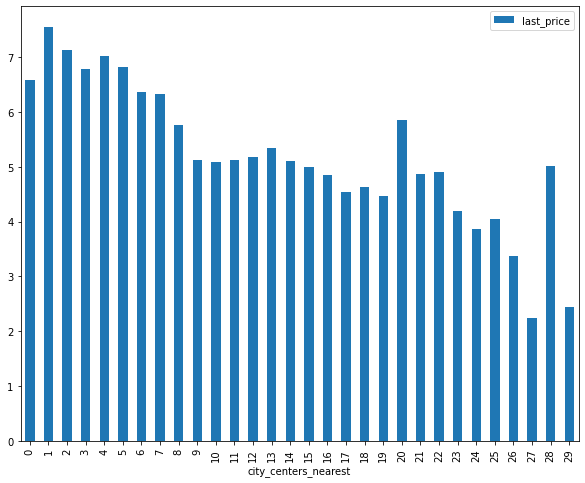

In [142]:
flats_in_spb = real_estate.query('locality_name == "Санкт-Петербург"')
flats_in_spb = flats_in_spb.query('city_centers_nearest != -1')
flats_in_spb_price = flats_in_spb.loc[:, ['locality_name', 'city_centers_nearest','last_price']]

#приводим цену в млн
flats_in_spb_price['last_price'] = flats_in_spb_price['last_price']/1000000
flats_in_spb_pivot = flats_in_spb_price.pivot_table(index='city_centers_nearest', values='last_price', aggfunc=('mean'))
flats_in_spb_pivot.plot(y='last_price', kind='bar', figsize=(10, 8));

<div class="alert alert-info"><b>
    Начиная с третьего километра цена сильно падает. С 4 по 7 километры наблюдается колебание стоимости и дальше снова падение цен. Будем считать центром километры с 0 по 2 включительно.
    Чем дальше от центра, тем дешевле жить, что вполне логично
    </b>
</div>

# Общий вывод

<div class="alert alert-info"><b>
    
- Изучили архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, что впоследствии поможет определять рыночную стоимость объектов недвижимости.
    
- заполнили пропущенные данные в исследуемых столбцах
    
- установили параметры (площадь, цена, число комнат, высота потолков и др.)
    
- установили связь между разными параметрами и построили графики
    
- избавились от редких и выбивающихся значений
    
</b>
</div>

## Пришли к выводам:



- ***от дня размещения объявления до продажи квартиры обычно проходит 70-100 дней;***


- ***дороже всего кадратный метр стоит в Санкт-Петербурге и в Пушкине, дешевле всего квартиру можно купить в Выборге;***


- ***квартиры на первом и последнем этаже дешевле, чем на любом другом;***


- ***отдаление от центра города связано с уменьшением стоимости недвижимости, при этом центральной части СПб это не касается - здесь квартиры одинаково дорогие;***


- ***обнаружилась следующая cвязь между временем размещения объявления и стоимостью квартиры: квартиры, выставленные на продажу в декабре и январе дороже, чем в другие месяцы; квартиры, выставленные на продажу на выходных, дешевле, чем в другие дни недели; квартиры были дороже всего в 2017 и 2018 году для населенных пунктов***